In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### a)
Implement the multi-armed bandit problem from chapter 2.3 of [1]. Make sure that you can vary the parameters. Use the parameters from Figure 2.1 as one possible fixed parameter set. Implement the automatic parameter generation as described in the book.

In [2]:
class Bandit:
    def __init__(self, k, mean=0, std_deviation=1):
        self.k = k
        self.mean = mean
        self.std_deviation = std_deviation
        self.q_star = np.random.normal(self.mean, self.std_deviation, self.k)

    def pull(self, arm):
        return np.random.normal(self.q_star[arm], 1)

class Agent:
    def __init__(self, bandit, epsilon, initial_value=0):
        self.bandit = bandit
        self.epsilon = epsilon
        self.k = bandit.k
        self.Q = np.full(self.k, initial_value)
        self.action_counts = np.zeros(self.k)

    def choose_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.k)
        else:
            return np.argmax(self.Q)

    def update(self, action, reward):
        self.action_counts[action] += 1
        self.Q[action] += (reward - self.Q[action]) / self.action_counts[action]

def simulate(runs, time_steps, k, epsilon, initial_value=0):
    avg_rewards = np.zeros(time_steps)
    optimal_action_percentages = np.zeros(time_steps)

    for run in range(runs):
        bandit = Bandit(k)
        agent = Agent(bandit, epsilon, initial_value)

        for t in range(time_steps):
            action = agent.choose_action()
            reward = bandit.pull(action)
            agent.update(action, reward)

            avg_rewards[t] += reward
            optimal_action_percentages[t] += (action == np.argmax(bandit.q_star))

    avg_rewards /= runs
    optimal_action_percentages = (optimal_action_percentages / runs) * 100

    return avg_rewards, optimal_action_percentages

In [3]:
def plot_results(epsilons, initial_values, runs=2000, time_steps=1000, k=10):
    for initial_value in initial_values:
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
        for epsilon in epsilons:
            avg_rewards, optimal_action_percentages = simulate(runs, time_steps, k, epsilon, initial_value)
            ax1.plot(avg_rewards, label=f"eps = {epsilon}")
            ax2.plot(optimal_action_percentages, label=f"eps = {epsilon}")

        ax1.set_xlabel("Time Steps")
        ax1.set_ylabel("Average Reward")
        ax1.set_title(f"Initial value Q = {initial_value}")
        ax1.legend()

        ax2.set_xlabel("Time Steps")
        ax2.set_ylabel("Optimal Action Percentage")
        ax2.set_title(f"Initial value Q = {initial_value}")
        ax2.legend()

        plt.tight_layout()
        plt.show()

#### b)
Reproduce the results from the example in Figure 2.2 of the book. Can you replicate the same behavior of average rewards and percentage of optimal actions with your implementation? Create plots that show the behavior of your implementation similar to these in the book.

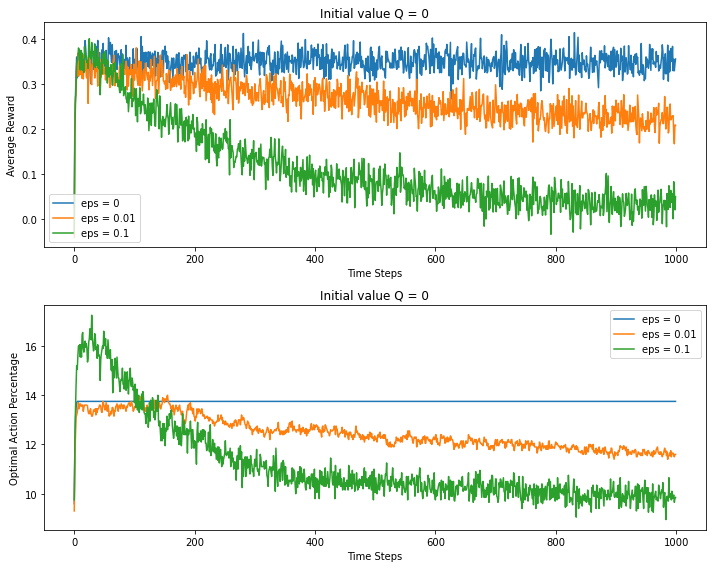

In [4]:
epsilons = [0, 0.01, 0.1]
plot_results(epsilons, [0])

#### c)
The example in Figure 2.3 shows the effect of initial action-values. What happens in your
implementation if you evaluate even more initial values Q and different ϵ-greedy settings?

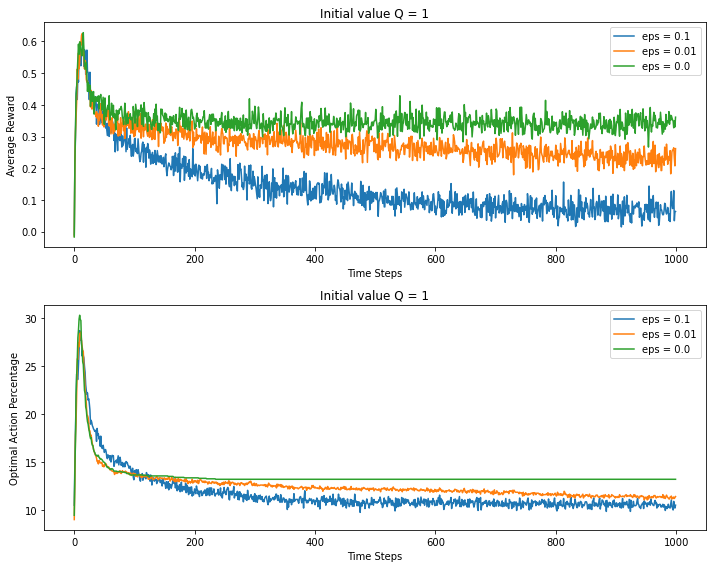

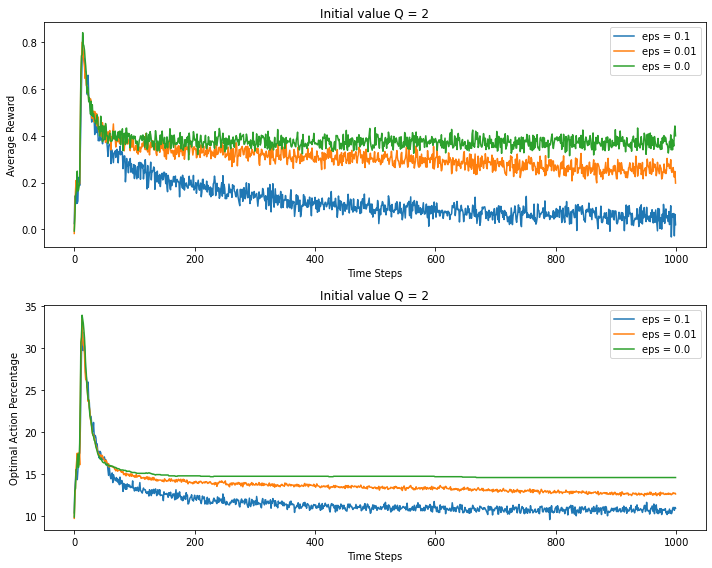

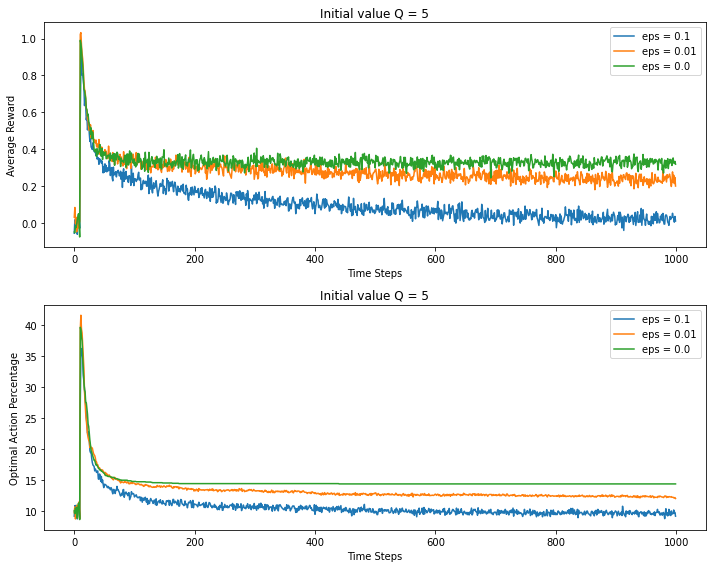

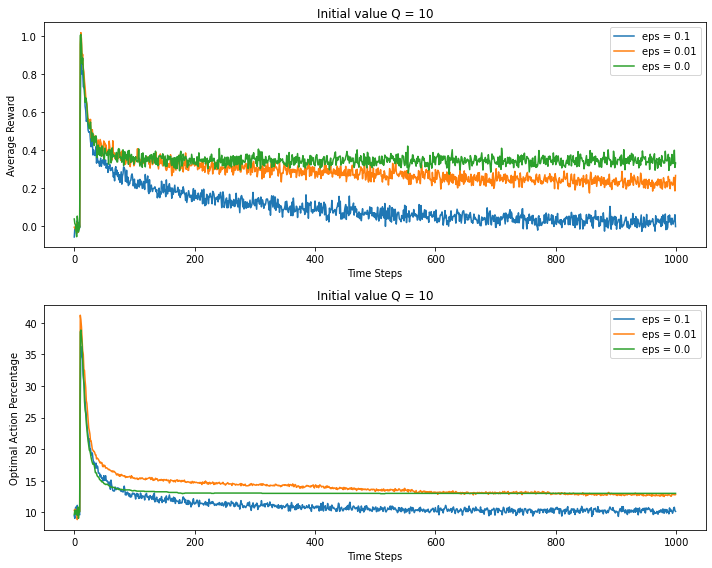

In [5]:
epsilons = [0.1, 0.01, 0.0]
initial_values = [1, 2, 5, 10]
plot_results(epsilons, initial_values)

Higher initial values of Q and higher epsilon values generally encourage more exploration, while lower initial values of Q and lower ε values encourage more exploitation. Choosing the right balance between exploration and exploitation can lead to better performance in solving the multi-armed bandit problem.